<a href="https://colab.research.google.com/github/chin2yere/FDSfE_COffor/blob/main/HW6/Homework_titanictree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


# 0.1 reading data from kaggle

In [2]:
pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


## create a file kaggle.json by requesting and API key to kaggle (under account) 
## https://www.kaggle.com/docs/api
## and upload it to your google drive. 
## Upload and read in the credential, store them as environmental variables

### Before class
Please register for an account at kaggle.com, all the work we will do together in class as well as your next homework will require it.
To register do the following:
- go to kaggle.com
- click on “Register” in the upper right corner
select either Register with Google, or Register with your email (it’s up to you)
- follow the instructions provided by kaggle to create an account (enter your email address, create a password, and choose a username), all of which are up to you, this will be your account after all
- Make sure that at the end, you have an account that you can log in with, and be logged in and ready next class

### In class

- Go to https://www.kaggle.com/ and sign in
- click on the icon of your avatar on the top right
- select account from the drop menu
- scroll down to API and click `create New API Token`. This will download a json file on your computer 
- open google drive at https://drive.google.com/drive/u/0/my-drive in your browser
-  upload the kaggle.json file from your laptop to the drive


In [4]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


make sure the file is there: this cell should return "kaggle.json"

In [6]:
ls kaggle.json

kaggle.json


the next cell changes who can access this file. Tokens are a seriously private thing! they are used to access sites. If someone were to hack the kaggle site and steal information from the user using your token you would be legally responsible for that! So keep your files secret. Don't share them with any one, don't print the content of the json file we use in your notebook. 

In [7]:
!chmod 600 kaggle.json

In [8]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']#"e60b57c215e877e01a22375a3058eec1"

In [9]:
#check that it worked by listing the kaggle datasets
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                    2030-07-01 23:59:00  Getting Started     Prizes         57           False  
gan-getting-started                             2030-07-01 23:59:00  Getting Started     Prizes         84           False  
store-sales-time-series-forecasting             2030-06-30 23:59:00  Getting Started  Knowledge        611           False  
tpu-getting-started                             2030-06-03 23:59:00  Getting Started  Knowledge        118           False  
digit-recognizer                                2030-01-01 00:00:00  Getting Started  Knowledge       1332           False  
titanic                                         2030-01-01 00:00:00  Getting Started  Knowledge      14540           False  


create a directory for these data


In [10]:
!mkdir kaggleTitanic

mkdir: cannot create directory ‘kaggleTitanic’: File exists


move to that directory


In [11]:
cd kaggleTitanic

/content/gdrive/My Drive/kaggleTitanic


download the titanic data into the directory you created for it

In [12]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!ls

gender_submission.csv  TitanicTree	titanic.zip
test.csv	       TitanicTree.pdf	train.csv


In [14]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

read in the data

In [15]:
titanic = pd.read_csv("train.csv").dropna(subset=["Survived", "Sex", "Pclass", "Age"])

In [16]:
titanic.shape

(714, 12)

In [17]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


The diagram above shows the first three columns of the data titanic.
It also shows the associated columns names, and the indices for the data.

# 0.2 data cleaning and wrangling

### turn gender into numeric

In [18]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})


the line above creates a new column which is basically a numeric representation of the sex column

In [19]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'gender'],
      dtype='object')

In [20]:
titanic.values

array([[1, 0, 3, ..., nan, 'S', 0],
       [2, 1, 1, ..., 'C85', 'C', 1],
       [3, 1, 3, ..., nan, 'S', 1],
       ...,
       [888, 1, 1, ..., 'B42', 'S', 1],
       [890, 1, 1, ..., 'C148', 'C', 0],
       [891, 0, 3, ..., nan, 'Q', 0]], dtype=object)

### throw away data that you will not use

In [21]:
titanic_short=titanic
titanic_short=titanic_short.drop(["PassengerId", "Survived","Name", "Sex","SibSp","Parch", "Ticket", "Fare", "Cabin", "Embarked"],axis=1, inplace=False)
#titanic_short.values


In [22]:
titanic_short.shape

(714, 3)

In [23]:
titanic_short.values

array([[ 3., 22.,  0.],
       [ 1., 38.,  1.],
       [ 3., 26.,  1.],
       ...,
       [ 1., 19.,  1.],
       [ 1., 26.,  0.],
       [ 3., 32.,  0.]])

In [24]:
titanic_short.columns

Index(['Pclass', 'Age', 'gender'], dtype='object')

# IDEALLY GET TO HERE IN CLASS TOGETHER - the rest can just be left in the notebook for the students to inspect. Its the by-hand flow chart I made for the slides

# 0.3 test the purity of various splits
## first split

### split by gender

In [25]:
print ("Survived fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 0).sum(),
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [26]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.gender.values == 0).sum(),
       ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 / 
      (titanic_short.gender.values == 1).sum()))

Died fraction
 M     F 
 0.79 0.25


### split by age (at 6.5)

In [27]:
print ("Survived fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Age.values <=6.5).sum()))

Survived fraction
 >6.5  <6.5 
 0.39  0.70


In [28]:
print ("Died fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.Age.values <=6.5).sum()))

Died fraction
 >6.5  <6.5 
 0.61  0.30


### split by travel class

In [29]:
print ("Survived fraction\n 1st   2nd \n {0:.2f}  {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 1).sum(),
       ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 2).sum()))

Survived fraction
 1st   2nd 
 0.66  0.48


In [30]:
print ("Survived fraction\n 2nd   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 2).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 2nd   3rd 
 0.48  0.24


In [31]:
print ("Survived fraction\n 1st   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 1).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 1st   3rd 
 0.66  0.24


In [32]:
print ("Survived fraction\n 1st   2nd or 3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 1).sum(),
        (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 3)).sum()))

Survived fraction
 1st   2nd or 3rd 
 0.66  0.47


# The purest split is by gender, so that is chosen as the first node

# second split

### by travel class

In [33]:
print ("Survived fraction of females: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
       (((titanic_short.gender.values == 1) & 
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 1) & 
        ~(titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & ~(titanic_short.Pclass.values == 1)).sum()))

Survived fraction of females: 
 1st   2nd,3rd
 0.96  0.65


In [34]:
print ("Survived fraction of males: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
        (((titanic_short.gender.values == 0) & 
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Pclass.values == 1)).sum(), 
        ((titanic_short.gender.values == 0) & 
        (~(titanic_short.Pclass.values == 1)) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (~(titanic_short.Pclass.values == 1))).sum() ))

Survived fraction of males: 
 1st   2nd,3rd
 0.40  0.15


### by age

In [35]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f} {1:.2f}".format
        (((titanic_short.gender.values == 1) & 
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values < 6.5)).sum(),
      
       ((titanic_short.gender.values == 1) & 
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of females: 
 <6.5  >=6.5   
 0.74 0.76


In [36]:
print ("Survived fraction of males: \n <6.5 >=6.5   \n {0:.2f}  {1:.2f}".format
     (((titanic_short.gender.values == 0) & 
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values < 6.5)).sum(),
     ((titanic_short.gender.values == 0) & 
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of males: 
 <6.5 >=6.5   
 0.67  0.18


## The purest split is 
## - for females by travel class
## - for males by age

# 0.4 actually run a tree model

Below I run a tree model, a simple Decision tree. Check out the syntax of the call and the hyperparameters. Next you will run tree ensamble models by yourself for the homework, but the syntax is generally the same

In [37]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini", 
                        random_state=222).fit(titanic_short.values, 
                                              titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

# 0.5 create the dendrogram viz

In [38]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data) 

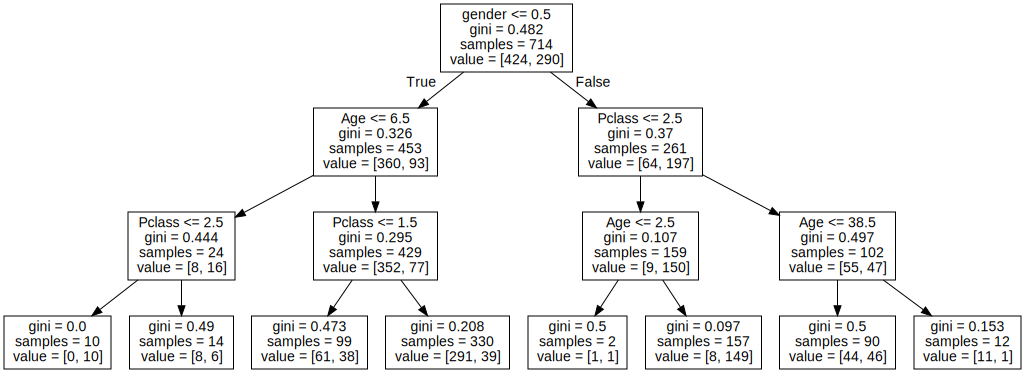

In [39]:
graph

The diagram above is a dendogram.
this is basically a diagram,  representing a decision tree.
It has a depth of 3 as written in the code. It is important for the max_depth to be lower to prevent overfitting of the data. The random tree classifier, when collected, constitutes a random forest classifier 


In [40]:
graph.render("TitanicTree")

'TitanicTree.pdf'

## THIS IS WHERE THE HOMEWORK YOU DO BY YOURSELF STARTS

# 1 run ensamble method: 
## changing model to Random Forest

In [41]:
titanic_short

,Pclass,Age,gender
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
885,3,39.0,1
886,2,27.0,0
887,1,19.0,1
889,1,26.0,0


In [42]:
from sklearn.model_selection import train_test_split
#your code ((571, 3), (571,), (143, 3), (143,))
X_train, X_test, y_train, y_test = train_test_split( titanic_short.values, titanic.Survived, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 3), (143, 3), (571,), (143,))

# 1. Split the data into a training and a test set

In [43]:
#from sklearn import ensemble
#ensemble.RandomForestClassifier?
#train score 0.90 test score 0.83

In [44]:
from numpy.random.mtrand import random
from sklearn import ensemble

rf =  ensemble.RandomForestClassifier(max_depth=10, random_state=222, criterion="gini").fit(X_train, y_train)

#rf.fit(X_train, y_train)

print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))

train score 0.91 test score 0.79


## change the hyper parameters and check the train and test score

changing max depth and check the score of the model

try another max depth and check the score of the model

In [45]:
rf =  ensemble.RandomForestClassifier(max_depth=3, random_state=222, criterion="gini"
                       ).fit(X_train, y_train)
#rf.fit(X_train, y_train)

print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))

train score 0.83 test score 0.78


In [46]:
rf =  ensemble.RandomForestClassifier(max_depth=2, random_state=222, criterion="gini").fit(X_train, y_train)
#rf.fit(X_train, y_train)

print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))

train score 0.82 test score 0.78


Which model is better? why? what would you report as your model accuracy?

the model with the maximum depth of 2 is the better model because its test and train score are closer in values to each other. Usually, the closer the test and train score values, the better the model. The difference in test and train score for the final model(the one with the maximum depth of 2) is just 0.04 points.

## changing model: do the same with the Gradient Boosted Trees

In [47]:
gbt =  ensemble.GradientBoostingClassifier(max_depth=10, random_state=222).fit(X_train,y_train)
#gbt.fit(X_train,y_train)
print ("train score %.2f"%gbt.score(X_train, y_train),
       "test score %.2f"%gbt.score(X_test, y_test))


train score 0.91 test score 0.78


In [48]:
gbt =  ensemble.GradientBoostingClassifier(max_depth=5, random_state=222).fit(X_train,y_train)
#gbt.fit(X_train,y_train)
print ("train score %.2f"%gbt.score(X_train, y_train),
       "test score %.2f"%gbt.score(X_test, y_test))

train score 0.91 test score 0.78


In [49]:
gbt =  ensemble.GradientBoostingClassifier(max_depth=2, random_state=222).fit(X_train,y_train)
#gbt.fit(X_train,y_train)
print ("train score %.2f"%gbt.score(X_train, y_train),
       "test score %.2f"%gbt.score(X_test, y_test))


train score 0.85 test score 0.77


The best model is the one with max_depth of 2(the third one) because its train and test scores are closer in values
Usually, the closer the test and train score values, the better the model. The difference in test and train score for the final model(the one with the maximum depth of 2) is just 0.05 points.

# 2 feature importance

Calculate the feature importance _and their uncertainties_ for the Random Forest:
- the feature importance of the model overall is contained in `rf.feature_importances_'
- the feature importance of each tree in the forest is obtained by 
1. extracting the i'th tree from the forest as `tree = rf.estimatorss[i]'
2. extracting the features importance for that tree as tree.feature_importances_

this way, one can calculate the variance or standard deviation of the importance of each feature

In [50]:
rf.feature_importances_

array([0.3690315 , 0.20147742, 0.42949108])

In [51]:
#list(tree.feature_importances_ for tree in rf.estimators_)
rf

RandomForestClassifier(max_depth=2, random_state=222)

In [52]:
#
fistd = np.std(np.array([tree.feature_importances_ for tree in rf.estimators_]), # in the [] build a "list comprehension statement" that results in a list of one feature importance vector for each tree in the forest
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (titanic_short.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
Pclass 0.37 +/- 0.3
Age 0.2 +/- 0.27
gender 0.43 +/- 0.36


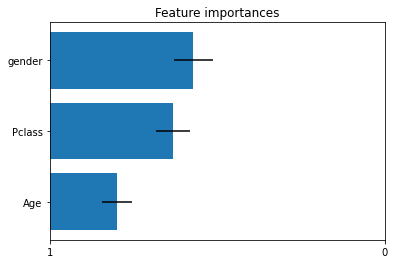

In [53]:
indices = np.argsort(rf.feature_importances_)
pl.figure()
pl.title("Feature importances")
pl.barh(np.arange(rf.feature_importances_.shape[0]), 
        rf.feature_importances_[indices],
        xerr=fistd[indices]/6, align="center"
       )
pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]), 
          labels=titanic_short.columns[indices])
pl.xlim(0, 1)
pl.show()

The diagram above shows the relative importance of each feature of the tree. It has a range from zero to one; usually the relative importances never exceed one. as the diagram shows, gender is of most importance, followed by PClass. Age showed the least influence in the survival rates.